# find-s

In [227]:
with open("play_tennis.csv",'r') as f:d = f.read().split('\n')
data = [i.split(',')[1:] for i in d]
data

[['outlook', 'temp', 'humidity', 'wind', 'play'],
 ['Sunny', 'Hot', 'High', 'Weak', 'No'],
 ['Sunny', 'Hot', 'High', 'Strong', 'No'],
 ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
 ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
 ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
 ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
 ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
 ['Sunny', 'Mild', 'High', 'Weak', 'No'],
 ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
 ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
 ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
 ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
 ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
 ['Rain', 'Mild', 'High', 'Strong', 'No']]

In [228]:
data = [['outlook', 'temp', 'humidity', 'wind','Water','Forecast', 'play'],
 ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm','Same','Yes'],
 ['Sunny', 'Warm', 'High', 'Strong','Warm','Same', 'Yes'],
 ['Rainy', 'Cold', 'High', 'Strong','Warm','Change', 'No'],
 ['Sunny', 'Warm', 'High', 'Strong','Cool','Change', 'Yes']]
att = (len(data[0]))
d = {}
for i in data[0]:
    d[i] = []
for i in data[1:]:
    for k,v in zip(data[0],i):
        d[k].append(v)
for i in data[0]:
    d[i] = list(set(d[i]))

h = ['?']  * (att-1)
d,h

({'outlook': ['Rainy', 'Sunny'],
  'temp': ['Cold', 'Warm'],
  'humidity': ['High', 'Normal'],
  'wind': ['Strong'],
  'Water': ['Warm', 'Cool'],
  'Forecast': ['Change', 'Same'],
  'play': ['No', 'Yes']},
 ['?', '?', '?', '?', '?', '?'])

In [229]:
h = data[1][:-1]
for i in data[1:]:
    if i[-1] == 'Yes':
        for j in range(len(i[:-1])):
            if h[j] != i[j]:
                h[j] = '?'
h

['Sunny', 'Warm', '?', 'Strong', '?', '?']

# Candi ELim

In [230]:
S = ['#'] * (att-1)
G = []

#init S
for i in data[1:]:
    if i[-1] == 'Yes':
        S= i[:-1]
        break
for i in data[1:]:
    # +ve
    if i[-1] == 'Yes':
        for j in range(att-1):
            if S[j] != i[j]:
                S[j] = '?'
        if len(G) != 0:
            rem = []
            for k in G:
                for j in range(att-1):
                    if k[j] != S[j] and k[j] != '?':
                        rem.append(k)
                        break
            for j in rem:
                G.remove(j)
    # -ve
    else:
        for j in range(att-1):
            if S[j] != i[j] and S[j] != '?':
                g = ['?'] * (att-1)
                g[j] = S[j]
                if g not in G:
                    G.append(g)
                
                
S,G

(['Sunny', 'Warm', '?', 'Strong', '?', '?'],
 [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']])

# ANN using Back Propogation

In [231]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]),dtype = float) # Hours Studied, Hours Slept 
y = np.array(([92], [86], [89]),dtype = float) # Test Score

X = X/np.amax(X,axis=0)
y = y/100
X,y

(array([[0.66666667, 1.        ],
        [0.33333333, 0.55555556],
        [1.        , 0.66666667]]),
 array([[0.92],
        [0.86],
        [0.89]]))

In [232]:
class NeuralNetwork(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
        
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (2x3) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer
        # print(f'{self.W1=},{self.W2=}')
        
    def feedForward(self, X):
        #forward propogation through the network
        self.z = np.dot(X, self.W1) #dot product of X (input) and first set of weights (3x2)
        self.z2 = self.sigmoid(self.z) #activation function
        self.z3 = np.dot(self.z2, self.W2) #dot product of hidden layer (z2) and second set of weights (3x1)
        output = self.sigmoid(self.z3)
        # print(f'{self.z=},{self.z2=},{self.z3=},{output=}')
        return output
        
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        #backward propogate through the network
        self.output_error = y - output # error in output
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        # print(f'{self.output_error=},{self.output_delta=}')

        self.z2_error = self.output_delta.dot(self.W2.T) #z2 error: how much our hidden layer weights contribute to output error
        self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True) #applying derivative of sigmoid to z2 error
        # print(f'{self.z2_error=},{self.z2_delta=}')

        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input -> hidden) weights
        self.W2 += self.z2.T.dot(self.output_delta) # adjusting second set (hidden -> output) weights
        # print(f'{self.W1=},{self.W2=}')

    def train(self, X, y):
        output = self.feedForward(X)
        self.backward(X, y, output)
        
NN = NeuralNetwork()


In [233]:
for i in range(50000): #trains the NN 1000 times
    if (i % 10000 == 0):
        print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X)))))
    NN.train(X, y)

Loss: 0.26257637199650213
Loss: 6.200515105890556e-06
Loss: 2.014477459879231e-07
Loss: 6.608696151975154e-09
Loss: 2.1736206163271118e-10


In [234]:
print("Input: " + str(X))
print("Actual Output: " + str(y))
print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X)))))
print("\n")
print("Predicted Output: " + str(NN.feedForward(X)))

Input: [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: [[0.92]
 [0.86]
 [0.89]]
Loss: 7.1526609714612225e-12


Predicted Output: [[0.91999595]
 [0.86000217]
 [0.89000056]]


# Naive Bayes Classifier

In [235]:
import numpy as np

data = [['outlook','temp','humidity','windy','play'],
['sunny','hot','high','Weak','no'],
['sunny','hot','high','Strong','no'],
['overcast','hot','high','Weak','yes'],
['rainy','mild','high','Weak','yes'],
['rainy','cool','normal','Weak','yes'],
['rainy','cool','normal','Strong','no'],
['overcast','cool','normal','Strong','yes'],
['sunny','mild','high','Weak','no'],
['sunny','cool','normal','Weak','yes'],
['rainy','mild','normal','Weak','yes'],
['sunny','mild','normal','Strong','yes'],
['overcast','mild','high','Strong','yes'],
['overcast','hot','normal','Weak','yes'],
['rainy','mild','high','Strong','no']]

def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    testset = list(dataset)
    i=0
    while len(trainSet) < trainSize:
        trainSet.append(testset.pop(i))
    return [trainSet, testset]

metadata,traindata=data[0],data[1:]
splitRatio=0.75
trainingset, testset=splitDataset(traindata, splitRatio)
train=np.array(trainingset)
test=np.array(testset)
train.shape,test.shape

((10, 5), (4, 5))

In [236]:
total_size = train.shape[0]

countYes = 0
countNo = 0
probYes = 0
probNo = 0

for x in range(train.shape[0]):
    if train[x,train.shape[1]-1] == 'yes':
        countYes +=1
    if train[x,train.shape[1]-1] == 'no':
        countNo +=1

probYes=countYes/total_size
probNo= countNo/total_size
probYes,probNo

(0.6, 0.4)

In [237]:
acc = 0
for i in range(test.shape[0]):
    p0 = np.zeros(train.shape[1]-1)
    p1 = np.zeros(train.shape[1]-1)
    for j in range(test.shape[1] - 1):
        c0 = 0
        c1 = 0
        for k in range(train.shape[0]):
            if test[i,j] == train[k,j] and train[k,-1] == 'yes':
                c1 += 1
            elif test[i,j] == train[k,j] and train[k,-1] == 'no':
                c0 += 1
        p0[j] = c0/probNo
        p1[j] = c1/probYes
        print(f'{p0=},{p1=}')
        
    p02 = probNo
    p12 = probYes
    for q in range(train.shape[1]-1):
        p02 *= p0[q] 
        p12 *= p1[q] 
    if p12 > p02:
        res = 'yes'
    else:
        res = 'no'
    if test[i,train.shape[1]-1] == res:
        acc += 1
acc/test.shape[0]



p0=array([7.5, 0. , 0. , 0. ]),p1=array([1.66666667, 0.        , 0.        , 0.        ])
p0=array([7.5, 2.5, 0. , 0. ]),p1=array([1.66666667, 3.33333333, 0.        , 0.        ])
p0=array([7.5, 2.5, 2.5, 0. ]),p1=array([1.66666667, 3.33333333, 6.66666667, 0.        ])
p0=array([7.5, 2.5, 2.5, 5. ]),p1=array([1.66666667, 3.33333333, 6.66666667, 1.66666667])
p0=array([0., 0., 0., 0.]),p1=array([3.33333333, 0.        , 0.        , 0.        ])
p0=array([0. , 2.5, 0. , 0. ]),p1=array([3.33333333, 3.33333333, 0.        , 0.        ])
p0=array([0. , 2.5, 7.5, 0. ]),p1=array([3.33333333, 3.33333333, 3.33333333, 0.        ])
p0=array([0. , 2.5, 7.5, 5. ]),p1=array([3.33333333, 3.33333333, 3.33333333, 1.66666667])
p0=array([0., 0., 0., 0.]),p1=array([3.33333333, 0.        , 0.        , 0.        ])
p0=array([0., 5., 0., 0.]),p1=array([3.33333333, 1.66666667, 0.        , 0.        ])
p0=array([0. , 5. , 2.5, 0. ]),p1=array([3.33333333, 1.66666667, 6.66666667, 0.        ])
p0=array([0. , 5. , 2.

0.75

In [238]:
prob0 =np.zeros((test.shape[1]-1))
prob1 =np.zeros((test.shape[1]-1))
accuracy=0

print("instance prediction  target")
for t in range(test.shape[0]):
    for k in range (test.shape[1]-1):
        count1=count0=0
        for j in range (train.shape[0]):
            #how many times appeared with no
            if test[t,k] == train[j,k] and train[j,train.shape[1]-1]=='no':
                count0+=1
            #how many times appeared with yes
            if test[t,k] == train[j,k] and train[j,train.shape[1]-1]=='yes':
                count1+=1
        prob0[k]=count0/countNo
        prob1[k]=count1/countYes
        print(f'{prob0=},{prob1=}')
    
    probno=probNo
    probyes=probYes

    for i in range(test.shape[1]-1):
        probno=probno*prob0[i]
        probyes=probyes*prob1[i]
    if probno>probyes:
        predict='no'
    else:
        predict='yes'

    print(t+1,"\t",predict,"\t    ",test[t,test.shape[1]-1])
    if predict == test[t,test.shape[1]-1]:
        accuracy+=1
final_accuracy=(accuracy/test.shape[0])*100
print("accuracy",final_accuracy,"%")

instance prediction  target
prob0=array([0.75, 0.  , 0.  , 0.  ]),prob1=array([0.16666667, 0.        , 0.        , 0.        ])
prob0=array([0.75, 0.25, 0.  , 0.  ]),prob1=array([0.16666667, 0.33333333, 0.        , 0.        ])
prob0=array([0.75, 0.25, 0.25, 0.  ]),prob1=array([0.16666667, 0.33333333, 0.66666667, 0.        ])
prob0=array([0.75, 0.25, 0.25, 0.5 ]),prob1=array([0.16666667, 0.33333333, 0.66666667, 0.16666667])
1 	 no 	     yes
prob0=array([0.  , 0.25, 0.25, 0.5 ]),prob1=array([0.33333333, 0.33333333, 0.66666667, 0.16666667])
prob0=array([0.  , 0.25, 0.25, 0.5 ]),prob1=array([0.33333333, 0.33333333, 0.66666667, 0.16666667])
prob0=array([0.  , 0.25, 0.75, 0.5 ]),prob1=array([0.33333333, 0.33333333, 0.33333333, 0.16666667])
prob0=array([0.  , 0.25, 0.75, 0.5 ]),prob1=array([0.33333333, 0.33333333, 0.33333333, 0.16666667])
2 	 yes 	     yes
prob0=array([0.  , 0.25, 0.75, 0.5 ]),prob1=array([0.33333333, 0.33333333, 0.33333333, 0.16666667])
prob0=array([0.  , 0.5 , 0.75, 0.5 ])

# Naive Bayes Text Classifier

In [239]:
import pandas as pd

data=pd.read_csv('text_classi.csv',names=['message','label'])
data.head()

,message,label
0,I love this sandwich,pos
1,This is an amazing place,pos
2,I feel very good about these beers,pos
3,This is my best work,pos
4,What an awesome view,pos


In [240]:
data['labelnum']=data.label.map({'pos':1,'neg':0})
X=data.message
Y=data.labelnum
data.head()

,message,label,labelnum
0,I love this sandwich,pos,1
1,This is an amazing place,pos,1
2,I feel very good about these beers,pos,1
3,This is my best work,pos,1
4,What an awesome view,pos,1


In [241]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)
xtrain.shape[0],xtest.shape[0]

(13, 5)

In [242]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm = count_vect.transform(xtest)

df=pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names_out())
df.head()

,about,am,amazing,an,awesome,bad,beers,best,boss,can,...,this,tired,to,today,very,view,went,what,with,work
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [243]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)

from sklearn import metrics
print('Accuracy metrics')
print('Accuracy of the classifer is',metrics.accuracy_score(ytest,predicted))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('Recall and Precison ')
print(metrics.recall_score(ytest,predicted))
print(metrics.precision_score(ytest,predicted))

Accuracy metrics
Accuracy of the classifer is 1.0
Confusion matrix
[[3 0]
 [0 2]]
Recall and Precison 
1.0
1.0


In [244]:
import pandas as pd
data=pd.read_csv('text_classi.csv',names=['message','label'])
# data.head()
data['res'] = data.label.map({'pos':1,'neg':0})

X = data['message']
y = data['res']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)
#X_train.shape[0],X_test.shape[0]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_tr = cv.fit_transform(X_train)
x_tr = cv.transform(X_test)

df = pd.DataFrame(X_tr.toarray(),columns=cv.get_feature_names_out())
#df.head()

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(X_tr,y_train)
predict = nb.predict(x_tr)

from sklearn import metrics

metrics.accuracy_score(y_test,predict),metrics.confusion_matrix(y_test,predict),metrics.precision_score(y_test,predict),metrics.recall_score(y_test,predict)


(0.6,
 array([[2, 0],
        [2, 1]], dtype=int64),
 1.0,
 0.3333333333333333)

# Bayesian Network

In [245]:
# !pip install pgmpy

In [246]:
import pandas as pd
# data=pd.read_csv("7.csv")
d2 = [['age','Gender','Family','diet','Lifestyle','cholestrol','heartdisease'],
[0,0,1,1,3,0,1],
[0,1,1,1,3,0,1],
[1,0,0,0,2,1,1],
[4,0,1,1,3,2,0],
[3,1,1,0,0,2,0],
[2,0,1,1,1,0,1],
[4,0,1,0,2,0,1],
[0,0,1,1,3,0,1],
[3,1,1,0,0,2,0],
[1,1,0,0,0,2,1],
[4,1,0,1,2,0,1],
[4,0,1,1,3,2,0],
[2,1,0,0,0,0,0],
[2,0,1,1,1,0,1],
[3,1,1,0,0,1,0],
[0,0,1,0,0,2,1],
[1,1,0,1,2,1,1],
[3,1,1,1,0,1,0],
[4,0,1,1,3,2,0]]
pd.DataFrame(d2[1:],columns = d2[0])

,age,Gender,Family,diet,Lifestyle,cholestrol,heartdisease
0,0,0,1,1,3,0,1
1,0,1,1,1,3,0,1
2,1,0,0,0,2,1,1
3,4,0,1,1,3,2,0
4,3,1,1,0,0,2,0
5,2,0,1,1,1,0,1
6,4,0,1,0,2,0,1
7,0,0,1,1,3,0,1
8,3,1,1,0,0,2,0
9,1,1,0,0,0,2,1


In [247]:
heart_disease=pd.DataFrame(d2[1:],columns = d2[0])

from pgmpy.models import BayesianNetwork
model=BayesianNetwork([
('age','Lifestyle'),
('Gender','Lifestyle'),
('Family','heartdisease'),
('diet','cholestrol'),
('Lifestyle','diet'),
('cholestrol','heartdisease'),
('Lifestyle','cholestrol')
])

In [248]:
from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

from pgmpy.inference import VariableElimination
HeartDisease_infer = VariableElimination(model)


In [249]:

# print('For age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4')
# print('For Gender Enter Male:0, Female:1')
# print('For Family History Enter yes:1, No:0')
# print('For diet Enter High:0, Medium:1')
# print('for lifeStyle Enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
# print('for cholesterol Enter High:0, BorderLine:1, Normal:2')

# q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
#     'age':int(input('enter age')),
#     'Gender':int(input('enter Gender')),
#     'Family':int(input('enter Family history')),
#     'diet':int(input('enter diet')),
#     'Lifestyle':int(input('enter Lifestyle')),
#     'cholestrol':int(input('enter cholestrol'))
#     })

# # print(q['heartdisease'])
# print(q)
k = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age':3,'Gender':0,'Family':1,'diet':1,'Lifestyle':3,'cholestrol':2})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [250]:
print(k)

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.8333 |
+-----------------+---------------------+
| heartdisease(1) |              0.1667 |
+-----------------+---------------------+


# Kmeans Guassian

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# df1 = pd.read_csv("8.csv")
d2 = [['Driver_ID','Distance_Feature','Speeding_Feature'],
[3423311935,71.24,28],
[3423313212,52.53,25],
[3423313724,64.54,27],
[3423311373,55.69,22],
[3423310999,54.58,25],
[3423313857,41.91,10],
[3423312432,58.64,20],
[3423311434,52.02,8],
[3423311328,31.25,34],
[3423312488,44.31,19],
[3423311254,49.35,40],
[3423312943,58.07,45],
[3423312536,44.22,22],
[3423311542,55.73,19],
[3423312176,46.63,43],
[3423314176,52.97,32],
[3423314202,46.25,35],
[3423311346,51.55,27],
[3423310666,57.05,26],
[3423313527,58.45,30],
[3423312182,43.42,23],
[3423313590,55.68,37],
[3423312268,55.15,18]]
df2 = pd.DataFrame(d2[1:],columns=d2[0])
df2.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


c:\Users\yalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\yalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\yalla\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


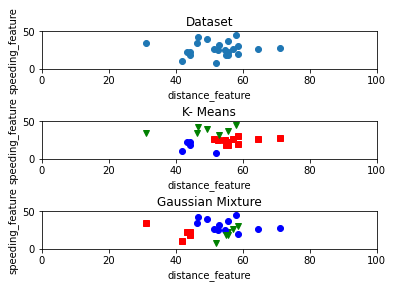

In [252]:
f1 = df2['Distance_Feature'].values
f2 = df2['Speeding_Feature'].values

X = np.matrix(list(zip(f1,f2)))

plt.plot(1)
plt.subplot(511)
plt.xlim([0, 100])
plt.ylim([0, 50])
plt.title('Dataset')
plt.ylabel('speeding_feature')
plt.xlabel('distance_feature')
plt.scatter(f1,f2)


colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# create new plot and data for K- means algorithm
plt.plot(2)
ax = plt.subplot(513)
kmeans_model = KMeans(n_clusters=3).fit(X)

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(f1[i], f2[i], color=colors[l],marker=markers[l])
    
plt.xlim([0, 100])
plt.ylim([0, 50])
plt.title('K- Means')
plt.ylabel('speeding_feature')
plt.xlabel('distance_feature')

# create new plot and data for gaussian mixture
plt.plot(3)
plt.subplot(515)
gmm=GaussianMixture(n_components=3).fit(X)
labels= gmm.predict(X)  

for i, l in enumerate(labels):
    plt.plot(f1[i], f2[i], color=colors[l], marker=markers[l])

plt.xlim([0, 100])
plt.ylim([0, 50])
plt.title('Gaussian Mixture')
plt.ylabel('speeding_feature')
plt.xlabel('distance_feature')


plt.show()

# KNN

In [253]:
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data
iris_labels=iris.target
iris.data.shape

(150, 4)

In [254]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_labels,test_size=0.30)
x_train.shape[0],x_test.shape[0]

(105, 45)

In [255]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5) 
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array([1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1,
       0])

In [256]:
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion matrix is as follows')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Matrics')
print(classification_report(y_test,y_pred))

Confusion matrix is as follows
[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]
Accuracy Matrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

